# Shortest paths in graphs
A weighted graph is fully characterized by a weighted adjacency matrix. For 
instance the graph depicted in Figure 1, 


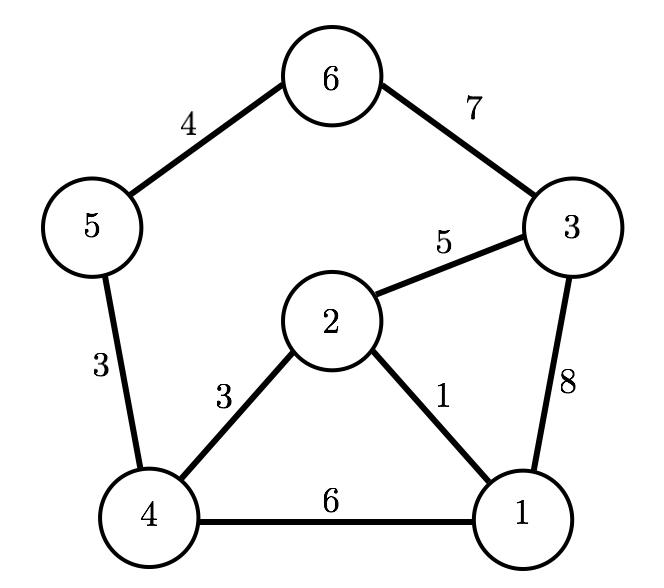
<center>Figure 1: Example of a graph</center>

can be represented by the matrix 



$$W=\left[ \matrix{ \infty  & 1 &   8 &  6 &  \infty & \infty\cr    1 & 
\infty & 5 &  3 &  \infty & \infty \cr    8  & 5 & \infty &  \infty &  \infty 
&   7\cr    6  & 3 & \infty & \infty  &  3  &  \infty \cr    \infty & \infty 
& \infty & 3 &   \infty &   4\cr    \infty & \infty & 7  & \infty &   4 &   
\infty} \right]$$

where $W_{ij}$ represents the cost of moving from $i$ to $j$ ($\infty$ means there is no path). While the graph of Figure 1 is undirected, we can also consider directed graphs, in which case the weighted adjacency matrix is not symmetric.

This live script presents three ways of computing a shortest path in a graph from a given initial node to a given final node: (i) using the dynamic programming algorithm; (ii) using the Dijkstra's algorithm; (iii) using the A* algorithm, in which case an additional function (heuristic) is needed. It is assumed the graph has no self-loops, i.e., all the diagonal terms of the weighted adjacency matrix are infinity. You can use the following script to test the functions corresponding to the three options to compute shortest paths, which can be found below.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

This is the implementation of the A* algorithm.

In [ ]:
def Astar(E, h, inode, fnode):
# very similar to Dijkstra's implementation except for the instruction
# dist_ = estdist(open); which, to account for the heuristic, is replaced by
# insdist_ = estdist(open)'+h(open);
    n, n_col = E.shape
    #A{i} is a vector with the neighbours of node i and C{i} a vector with the
    #corresponding costs of the links between i and neighbour
    A = [[] for _ in range(n)]
    C = [[] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if ~np.isinf(E[i,j]):
                A[i].append(j)
                C[i].append(E[i,j])
# list of open nodes contains initially the initial node of the optimal
# path, and estimated distances to this initial node are set to zero for
# all but the initial node for which it is zero, previous node is an array
# containing the previous node along the optimal path for each node

    opn = [inode-1]
    openT = []
    estdist = np.Inf * np.ones((n,1))
    estdist[inode-1] = 0
    prevnode = [[0] for _ in range(n)]

    k = 0
    estdistT = [[[] for _ in range(2)] for _ in range(n)] 
    while True:
        # select curnode as the one with the smallest distance, taking into
        # account heuristic

        try:
            dist_ = estdist[opn[1]]
            dist_ = estdist[opn[:]]
            estdistT[k][0] = estdist[opn[:]]
            estdistT[k][1] = h[opn[:]]
            dist_ = []
            for (idx, jdx) in zip(estdist[opn[:]],h[opn[:]]):
                dist_.append(idx + jdx)
        except: 
            dist_ = estdist[opn[0]]+h[opn[0]]
            estdistT[k][0] = estdist[opn[0]]
            estdistT[k][1] = h[opn[0]]
        openT.append(opn)
    
        b = [x for x,y in sorted(enumerate(dist_), key = lambda x: x[1])]
        curnode = opn[b[0]]
        #if it is the final node stop
        if curnode+1 == fnode:
            break
        
        if b[0]-1 < 0:
            aux_1 = []
        else:
            aux_1 = opn[:b[0]]
        
        aux_2 = opn[b[0]+1:]
        opn = aux_1 + aux_2
        opn = [e for e in opn if e]


        # for each neighbour of the current node if the cost of the path for going
        # throught the current node to the initial node is smaller than current
        # estimate, update current estimate and set previous node to current
        # node
        for j in range(len(A[curnode])):
            if  estdist[curnode] + C[curnode][j] < estdist[A[curnode][j]]:
                # aux = any(opn == A[curnode][j])
                aux = 0
                for a in opn:
                    if a == A[curnode][j]:
                        aux = 1
                        break

                if aux == 0:
                    opn.append(A[curnode][j])
                    
                estdist[A[curnode][j]] = estdist[curnode] + C[curnode][j]
                prevnode[A[curnode][j]] = curnode+1
        k += 1
    node = fnode
    optpath = [node]
    while (node != inode):
        optpath.append(prevnode[node-1])
        node = prevnode[node-1]
    return optpath, openT, estdistT
    

These are additional functions for plotting purposes

In [ ]:
def plottriangle(p, theta, ax):
    d1 = 0.15
    d2 = 0.03
    p1 = p
    p2 = p + np.array([-d1 * np.cos(theta) - d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) - d2 * np.cos(theta)])
    p3 = p + np.array([-d1 * np.cos(theta) + d2 * np.sin(theta), 
                       -d1 * -np.sin(theta) + d2 * np.cos(theta)])
    tri = patches.Polygon(np.vstack([p3, p2, p1]), 20, facecolor='k', edgecolor='k')
    ax.add_patch(tri)


def plot_transdiag(J, u):
    # plot dots
    n, n_col = J.shape
    fnode = np.max(u[:,-2])
    fig, ax = plt.subplots(1)
    for k in range(n-1):
        for i in range(n):
            plt.plot( k, i+1 , 'ko')

    plt.plot( n-1, fnode+1 , 'ko')
    
    # plot arrows
    for k in range(n-1):
        for i in range(n):
            if u[i,k] != 0:
                plt.plot([k,k+1],[i+1,u[i,k]+1],'k')
                # triangles
                plottriangle( [k+1, u[i,k]+1], -math.atan(u[i,k]-i), ax)
    
    plt.xlabel('Stage k')
    plt.ylabel('State x_k')

This is the implementation of the Dijkstra's algorithm.

In [ ]:
def dijkstra(E, inode, fnode):

    n, n_col = E.shape
    # A{i} is a vector with the neighbours of node i and C{i} a vector with the
    # corresponding costs of the links between i and neighbour
    A = [[] for _ in range(n)]
    C = [[] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if ~np.isinf(E[i,j]):
                A[i].append(j)
                C[i].append(E[i,j])

    # list of open nodes contains initially the initial node of the optimal
    # path, and estimated distances to this initial node are set to zero for
    # all but the initial node for which it is zero, previous node is an array
    # containing the previous node along the optimal path for each node
    
    
    opn = [inode-1]
    openT = [[] for _ in range(n)]
    estdist = np.Inf * np.ones((n,1))
    estdist[inode-1] = 0
    prevnode = [[0] for _ in range(n)]
    k = 0
    estdistT = [[] for _ in range(n)]
    
    while True:
        # select current node curnode as the one with the smallest estimated distance
        dist_ = []
        for i in opn:
            dist_.append(estdist[i])
        
        openT[k] = opn
        estdistT[k] = dist_
        b = sorted(range(len(dist_)), key=lambda k: dist_[k])
        curnode = opn[b[0]]
        # if it is the final node stop
        if curnode+1 == fnode:
            break
        
        if b[0]-1 < 0:
            aux_1 = []
        else:
            aux_1 = opn[:b[0]]
        
        aux_2 = opn[b[0]+1:]
        opn = aux_1 + aux_2
        opn = [e for e in opn if e]

        # for each neighbour of the current node if the cost of the path for going
        # throught the current node to the initial node is smaller than current
        # estimate, update current estimate and set previous node to current
        # node
        for j in range(len(A[curnode])):
            if  estdist[curnode] + C[curnode][j] < estdist[A[curnode][j]]:
                aux = 0
                for a in opn:
                    if a == A[curnode][j]:
                        aux = 1
                        break

                if aux == 0:
                    opn.append(A[curnode][j])
                    
                estdist[A[curnode][j]] = estdist[curnode] + C[curnode][j]
                prevnode[A[curnode][j]] = curnode+1
        k += 1

    node = fnode
    optpath = [node]
    # extract optimal path
    while (node != inode):
        optpath.append(prevnode[node-1])
        node = prevnode[node-1]

    return optpath,openT, estdistT

This is the implementation of the dynamic programming algorithm.

In [ ]:
def shortestpathDP(E, fnode):

    n, n_col = E.shape
    J = np.zeros((n,n))
    for idx in range(n): # set all the terminal costs to infinity except the one corresponding to the final node
        J[idx, n-1] = np.Inf
    J[fnode-1, n-1] = 0
    action = np.zeros((n, 1))
    u = np.zeros((n, n))

    for i in range(n):
        E[i,i] = 0 # while the graph is assumed to have no self-loops in order for the algorithm to work well allow self-loops with zero cost

    # DP algorithm
    u_ = np.zeros((n,n-1))
    for k in range(n-2,-1,-1):
        for i in range(n):
            J[i,k] = np.min( E[i,:].T + J[:,k+1] )
            u_[i,k] = np.argmin(E[i,:].T + J[:,k+1] )
            if ~np.isinf( J[i,k] ):
                if E[i,i] + J[i,k+1] == J[i,k]: # give preference to picking to stay at the same node
                    u[i,k] = i
                else:
                    u[i,k] = u_[i,k]            # only update the next node to go to [action] if there is a change
                    action[i] = u[i,k]
    J_ = J[:,0]
    return action, J_, J, u


In [ ]:
optAlg      = 3 # 1 DP, 2 Dijkstra, 3 A*
initialnode = 1
finalnode   = 6

E = np.array([[np.Inf,  1,  8,   6,   np.Inf,  np.Inf],
            [1,   np.Inf,  5,   3,   np.Inf,  np.Inf],
            [8,     5, np.Inf,  np.Inf, np.Inf,   7],
            [6,     3, np.Inf,  np.Inf,  3,   np.Inf],
            [np.Inf, np.Inf, np.Inf,  3,    np.Inf, 4],
            [np.Inf, np.Inf,  7,  np.Inf,   4,   np.Inf]])

pathDescription = ""

if optAlg == 1:
    actions, cost, J, u = shortestpathDP(E, finalnode)
    plot_transdiag(J,u)
    optpath = [ [] for i in range(len(cost)-1)]
    optpath[0] = initialnode
    
    i = 0
    while True:
        if np.not_equal(optpath[i], finalnode):
            optpath[i+1] = actions[int(optpath[i]-1)]+1
        else:
            break
        i += 1
    pathDescription = "Optimal Path using DP:"

elif optAlg == 2:
    [optpath,openT, estdistT] = dijkstra(E, initialnode, finalnode)
    pathDescription = "Optimal path using Dijkstra:"
    optpath.reverse()

elif optAlg == 3:
    h = np.ones((6,1)) # specify heuristic, in this example set to zero so it coincides with Dijktra but in general different from zero
    optpath, openT, estdistT = Astar(E , h,initialnode, finalnode)
    pathDescription = "Optimal path using A*:"
    optpath.reverse()

In [ ]:
pathDescription

In [ ]:
optpath